In [1]:
import torch
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
import requests
import zipfile
from pathlib import Path

In [4]:
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} directory exists.')
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping pizza, steak and sushi data...')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
unzipping pizza, steak and sushi data...


In [5]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [7]:
train_dir = image_path/'train'
test_dir = image_path/'test'

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/sushi/887831.jpg
Image class: sushi
Image height: 512
Image width: 512


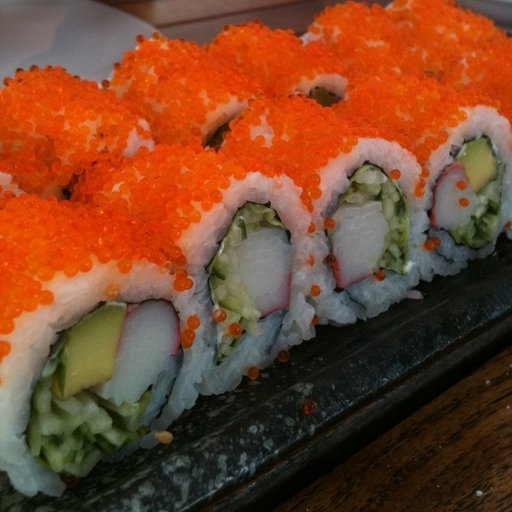

In [8]:
import random
from PIL import Image
#random.seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

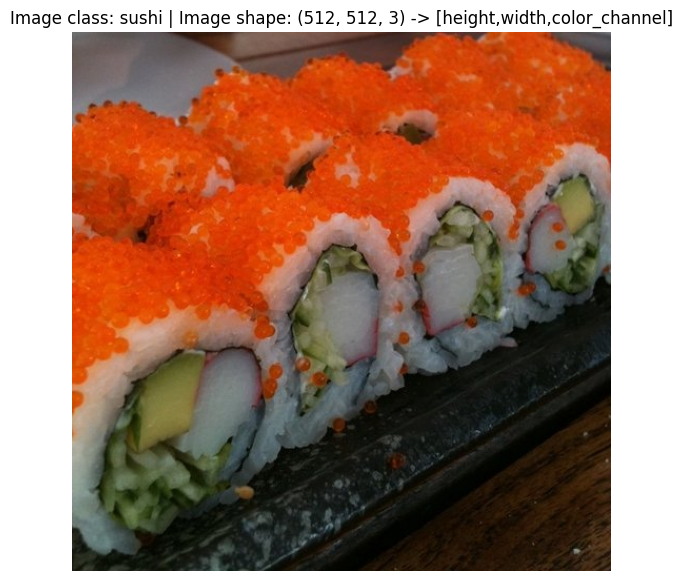

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height,width,color_channel]")
plt.axis('off')

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [12]:
data_transform(img)

tensor([[[0.3451, 0.3451, 0.3451,  ..., 0.4078, 0.4157, 0.4196],
         [0.3373, 0.3451, 0.3412,  ..., 0.4118, 0.4196, 0.4157],
         [0.2784, 0.2941, 0.4627,  ..., 0.4196, 0.4078, 0.4000],
         ...,
         [0.2627, 0.2784, 0.2510,  ..., 0.2431, 0.1137, 0.1137],
         [0.2157, 0.2314, 0.2353,  ..., 0.1333, 0.1451, 0.1373],
         [0.2235, 0.2235, 0.2588,  ..., 0.1294, 0.1451, 0.1255]],

        [[0.3412, 0.3294, 0.3255,  ..., 0.3843, 0.4000, 0.4157],
         [0.3255, 0.3216, 0.3098,  ..., 0.3725, 0.3843, 0.3882],
         [0.2549, 0.2392, 0.2588,  ..., 0.3686, 0.3647, 0.3608],
         ...,
         [0.1686, 0.1804, 0.1686,  ..., 0.2941, 0.1412, 0.1294],
         [0.1412, 0.1490, 0.1529,  ..., 0.1569, 0.1686, 0.1529],
         [0.1490, 0.1451, 0.1608,  ..., 0.1529, 0.1686, 0.1412]],

        [[0.3608, 0.3451, 0.3412,  ..., 0.3765, 0.4000, 0.4118],
         [0.3451, 0.3373, 0.3176,  ..., 0.3647, 0.3765, 0.3765],
         [0.2588, 0.2431, 0.1922,  ..., 0.3569, 0.3569, 0.

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):

  if seed:
    random.seed(42)

  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

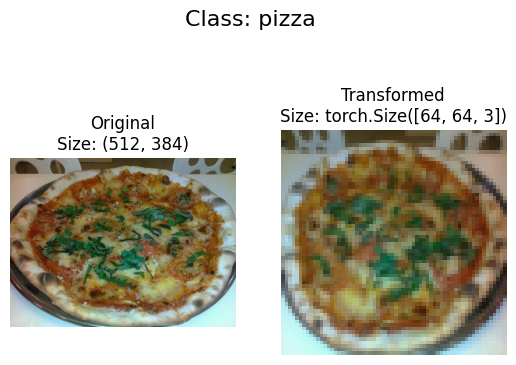

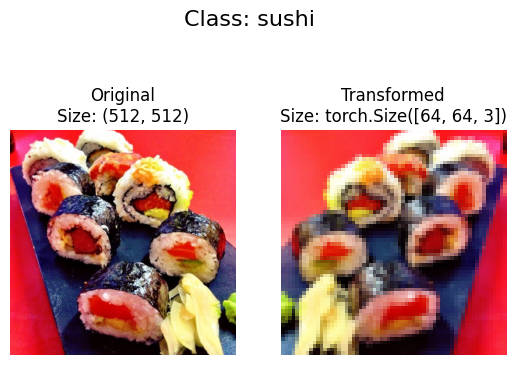

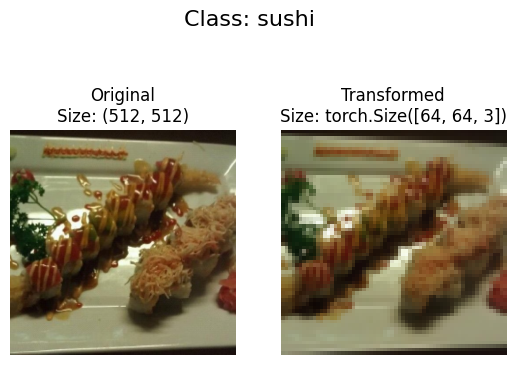

In [14]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [15]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [17]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
img,label = train_data[0][0],train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatypes: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Text(0.5, 1.0, 'pizza')

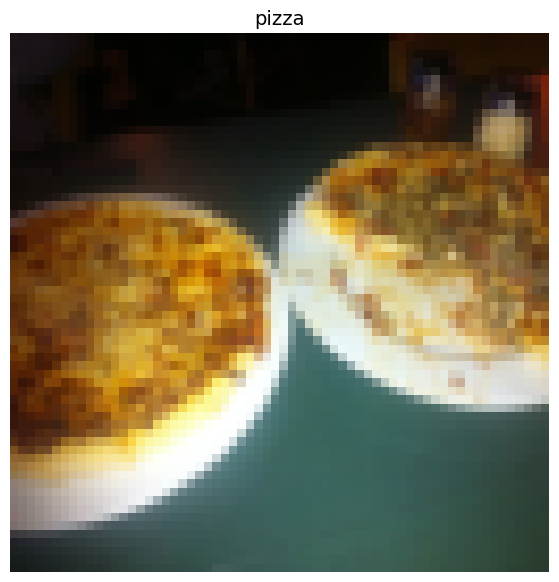

In [19]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_name[label],fontsize=14)

In [20]:
import os
os.cpu_count()

2

In [21]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3e777435f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3e9017f200>)

In [22]:
img,label = next(iter(train_dataloader))

print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

In [24]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
target_directory = train_dir
print(f"target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"couldn't find any classes in {directory}... please check file structure.")

  class_to_idx = {class_name: i for i,class_name in enumerate(classes)}

  return classes,class_to_idx

In [27]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self,
               targ_dir:str,
               transform=None):

    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transform = transform

    self.classes,self.class_to_idx = find_classes(targ_dir)

  def load_image(self,index:int)->Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self)-> int:
    return len(self.paths)

  def __getitem__(self,index: int)-> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]


    if self.transform:
      return self.transform(img), class_idx
    else:
      return img,class_idx

In [29]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [30]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,transform=test_transforms)

In [31]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7f3e77765280>,
 <__main__.ImageFolderCustom at 0x7f3e77743ef0>)

In [32]:
len(train_data),len(train_data_custom)

(225, 225)

In [33]:
len(test_data),len(test_data_custom)

(75, 75)

In [34]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [35]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [36]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [37]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):

  if n>10:
    n=10
    display_shape = False
    print(f'for display, purpose, n should not be larger than 10, setting to 10')

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))

  for i,targ_sample in enumerate(random_samples_idx):
    targ_image,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

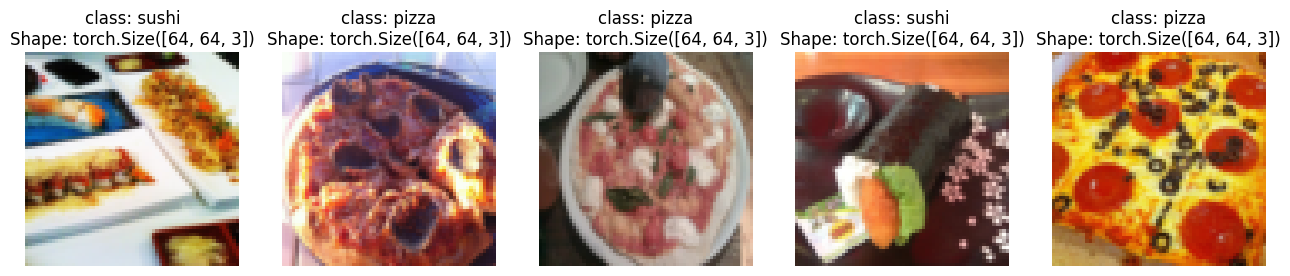

In [38]:
display_random_images(train_data,n=5,classes=class_name,seed=42)

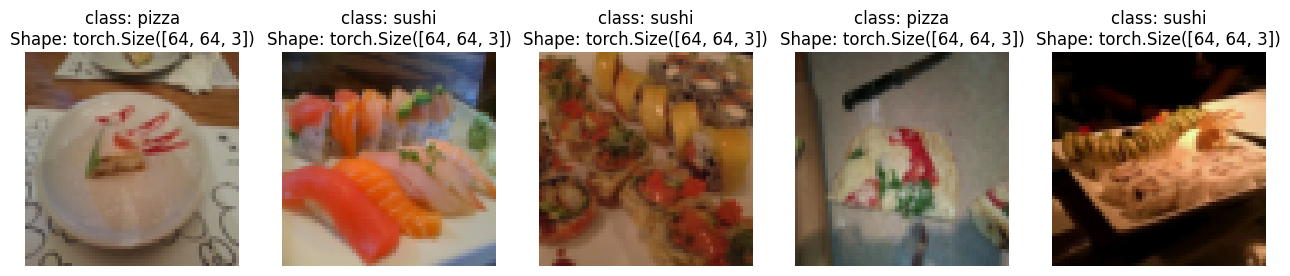

In [39]:
display_random_images(train_data_custom,n=5,classes=class_name,seed=42)

In [40]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom,test_data_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f3e905176e0>,
 <__main__.ImageFolderCustom at 0x7f3e77743ef0>)

In [41]:
img_custom,label_custom = next(iter(train_dataloader_custom))

print(f"image shape: {img_custom.shape}")
print(f"label shape: {label_custom.shape}")

image shape: torch.Size([32, 3, 64, 64])
label shape: torch.Size([32])


In [42]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [43]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg')]

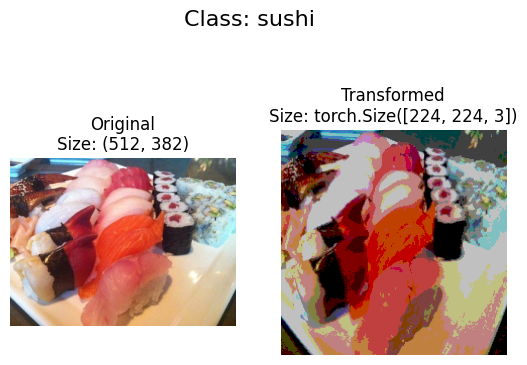

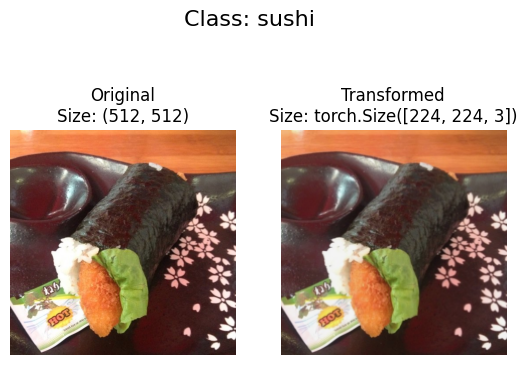

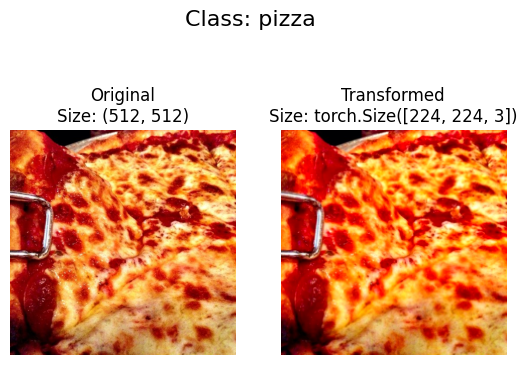

In [44]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [45]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [46]:
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [47]:
class TinyVGG(nn.Module):

  def __init__(self,input_shape: int,
               hidden_units: int,
               output_shape: int)->None:

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units ,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self,x):
     x = self.conv_block_1(x)
    #  print(x.shape)
     x = self.conv_block_2(x)
    #  print(x.shape)
     x = self.classifier(x)
    #  print(x.shape)
     return x # return self.classifier(self.conv_block_2(self.conv_block_2(x)))

In [48]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_name)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [49]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:

model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary
summary(model_0,
        input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [53]:
def train_step(model,dataloader,loss_fn,optimizer,device=device):

  model.train()

  train_loss, train_acc = 0,0

  for batch,(x,y) in enumerate(dataloader):
    x,y = x.to(device),y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss,train_acc

In [54]:
def test_step(model,dataloader,loss_fn,device=device):

  model.eval()

  test_loss,test_acc = 0,0

  with torch.inference_mode():
    for batch, (x,y) in enumerate(dataloader):
      x,y = x.to(device),y.to(device)

      test_pred_logits = model(x)
      loss = loss_fn(test_pred_logits,y)

      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss,test_acc

In [55]:
from tqdm.auto import tqdm

In [56]:
def train(model,train_dataloader,test_dataloader,optimizer,loss_fn,epochs=5,device=device):

  results = {'train_loss': [],
             'train_acc': [],
             'test_loss': [],
             'test_acc': []}

  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epochs: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.3f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.3f}")

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results


In [57]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)


from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.1063 | Train acc: 0.305 | Test loss: 1.0983 | Test acc: 0.301
Epochs: 1 | Train loss: 1.0998 | Train acc: 0.328 | Test loss: 1.0697 | Test acc: 0.542
Epochs: 2 | Train loss: 1.0869 | Train acc: 0.488 | Test loss: 1.0808 | Test acc: 0.492
Epochs: 3 | Train loss: 1.0845 | Train acc: 0.402 | Test loss: 1.0606 | Test acc: 0.583
Epochs: 4 | Train loss: 1.0663 | Train acc: 0.418 | Test loss: 1.0659 | Test acc: 0.564
Total training time: 10.309 seconds


In [58]:
model_0_results

{'train_loss': [1.106319472193718,
  1.0997999459505081,
  1.0868688076734543,
  1.0845322012901306,
  1.0662962794303894],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.40234375, 0.41796875],
 'test_loss': [1.0983213186264038,
  1.069693962732951,
  1.0807854731877644,
  1.0606199900309246,
  1.0658516486485798],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

In [59]:
def plot_loss_curves(results:Dict[str,List[float]]):

  loss = results['train_loss']
  test_loss = results['test_loss']

  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='train_accuracy')
  plt.plot(epochs,test_accuracy,label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

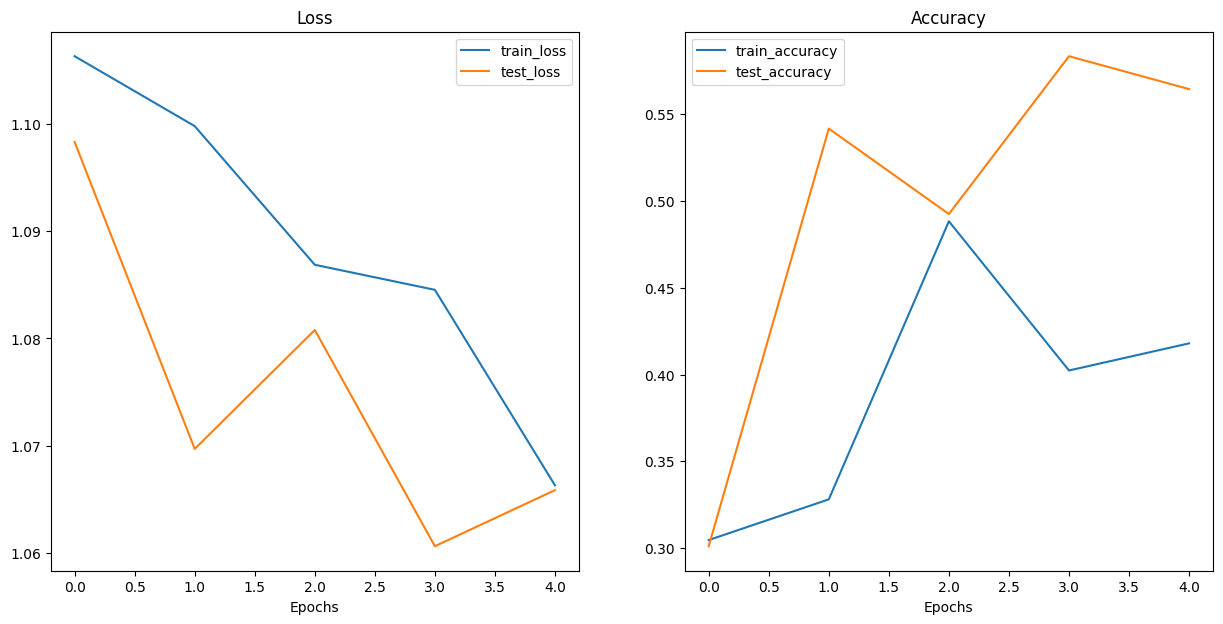

In [60]:
plot_loss_curves(model_0_results)

In [61]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [62]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [63]:
import os
from torch.utils.data import dataloader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [64]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"total training time of model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.1049 | Train acc: 0.250 | Test loss: 1.1019 | Test acc: 0.260
Epochs: 1 | Train loss: 1.0807 | Train acc: 0.426 | Test loss: 1.1261 | Test acc: 0.260
Epochs: 2 | Train loss: 1.0712 | Train acc: 0.426 | Test loss: 1.1593 | Test acc: 0.260
Epochs: 3 | Train loss: 1.1254 | Train acc: 0.305 | Test loss: 1.1581 | Test acc: 0.260
Epochs: 4 | Train loss: 1.0857 | Train acc: 0.426 | Test loss: 1.1550 | Test acc: 0.333
total training time of model_1: 4.841 seconds


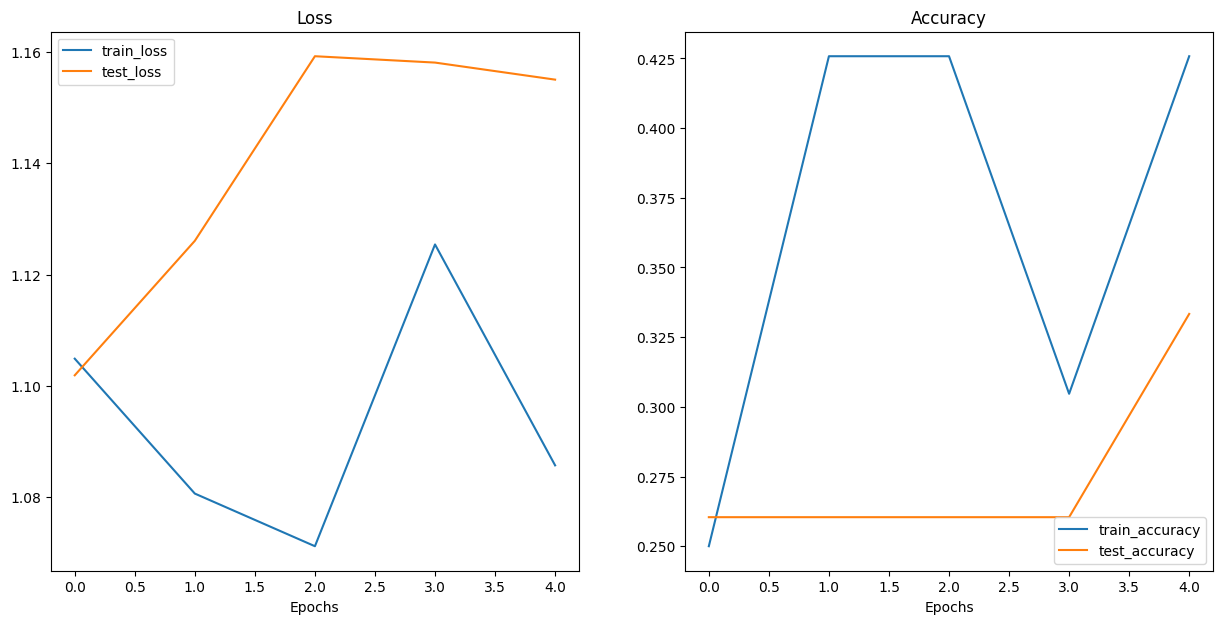

In [66]:
plot_loss_curves(model_1_results)

In [67]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099800,0.328125,1.069694,0.541667
2,1.086869,0.488281,1.080785,0.492424
3,1.084532,0.402344,1.060620,0.583333
4,1.066296,0.417969,1.065852,0.564394


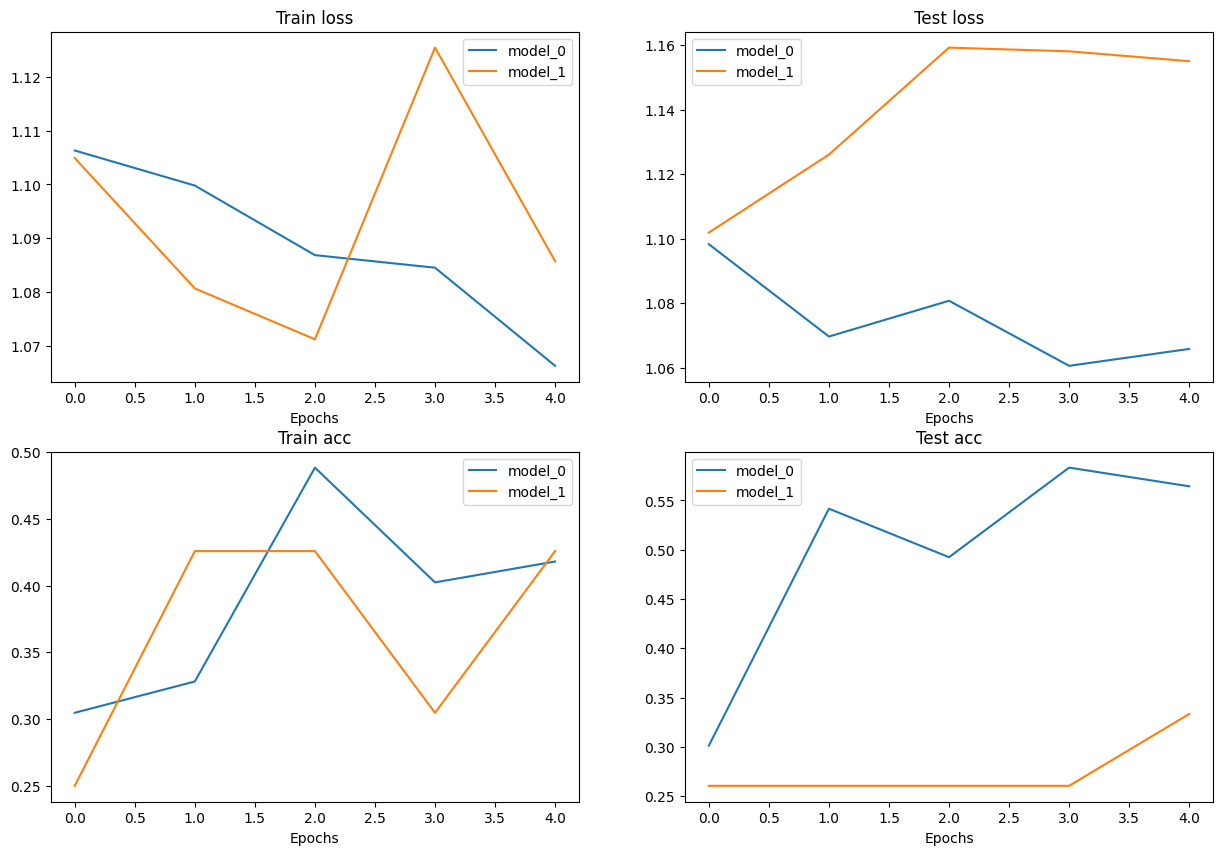

In [70]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs,model_0_df['train_loss'],label='model_0')
plt.plot(epochs,model_1_df['train_loss'],label='model_1')
plt.title('Train loss')
plt.xlabel('Epochs')
plt.legend()


plt.subplot(2,2,2)
plt.plot(epochs,model_0_df['test_loss'],label='model_0')
plt.plot(epochs,model_1_df['test_loss'],label='model_1')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs,model_0_df['train_acc'],label='model_0')
plt.plot(epochs,model_1_df['train_acc'],label='model_1')
plt.title('Train acc')
plt.xlabel('Epochs')
plt.legend()


plt.subplot(2,2,4)
plt.plot(epochs,model_0_df['test_acc'],label='model_0')
plt.plot(epochs,model_1_df['test_acc'],label='model_1')
plt.title('Test acc')
plt.xlabel('Epochs')
plt.legend()

In [71]:
import requests

custom_image_path = data_path / '04-pizza-dad.jpeg'

if not custom_image_path.is_file():
  with open(custom_image_path,'wb') as f:
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg')
    print(f'Downloading {custom_image_path}...')
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

In [72]:
import torchvision

custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
custom_image_unit8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

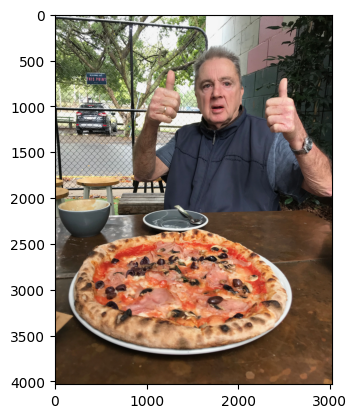

In [74]:
plt.imshow(custom_image_unit8.permute(1,2,0))

In [75]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

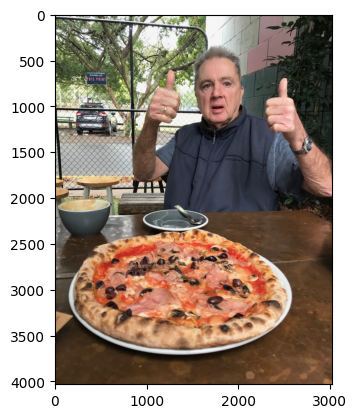

In [76]:
plt.imshow(custom_image.permute(1,2,0))

In [77]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)
print(f"original shape: {custom_image.shape}")
print(f"transformed shape: {custom_image_transformed.shape}")

original shape: torch.Size([3, 4032, 3024])
transformed shape: torch.Size([3, 64, 64])


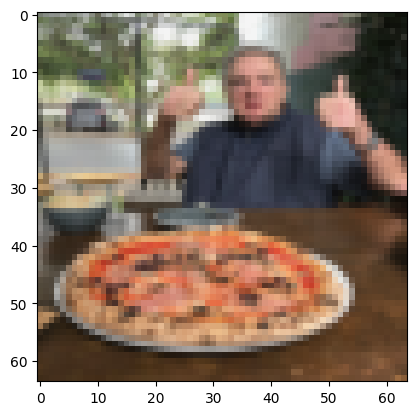

In [78]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [79]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [80]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.0798,  0.0358, -0.2083]], device='cuda:0')

In [81]:
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3695, 0.3536, 0.2770]], device='cuda:0')

In [82]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [84]:
class_name[custom_image_pred_labels]

'pizza'

In [86]:
def pred_and_plot_image(model,image_path,class_name,transform,device=device):

  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image/255.
  if transform:
    target_image = transform(target_image)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred,dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs,dim=1)

  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_name:
    title = f"Pred: {class_name[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)

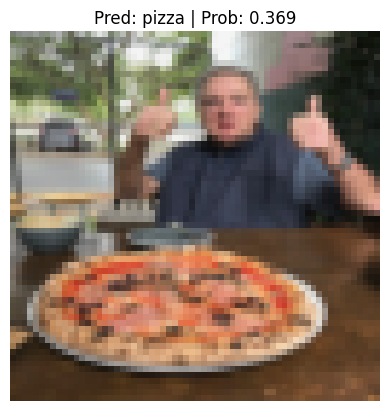

In [87]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_name=class_name,
                    transform=custom_image_transform,
                    device=device)